# Algoritmo para amplicação de imagens inserindo cores do intervalo ao dos pixels originais

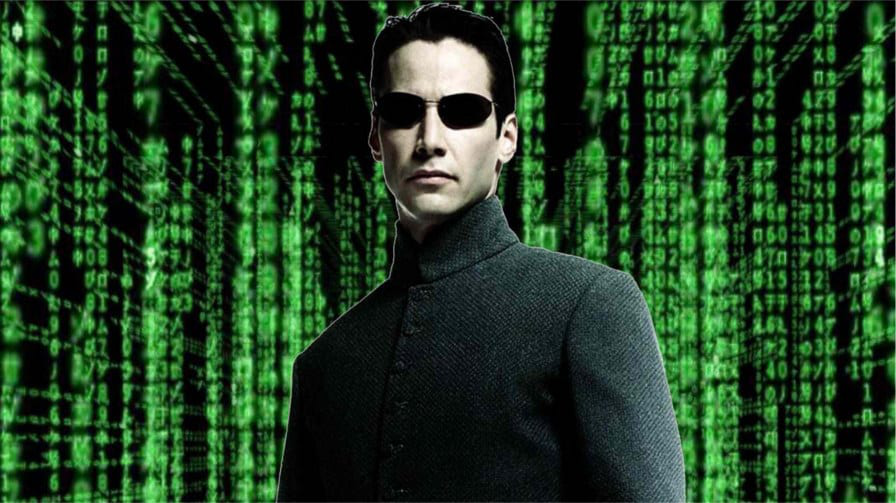

In [9]:
from PIL import Image
from numpy import asarray

# vamos carregar a imagem
imagem_matrix = Image.open('matrix.jpg')

# e visualiza-la
imagem_matrix

Algoritmo:

 - ler a imagem original
 - transformar a imagem original em array
 - criar o array de zeros com o dobro de linhas da imagem original
 - percorrer a matriz em todas as suas 3 dimensões
 - em cada posição eu verifico se estamos na linha correspondente a imagem original ou na linha entre as da imagem original do qual serao inseridos os pixels intermediarios
 - se estivermos na linha correspondente a da imagem original somente atribuimos o valor da imagem original ao do array de zeros
 - se estivermos na linha intermediaria entao eu subtraio o menor valor de R, de G, e de B da linha atual ou da de baixo do maior para buscar a diferença
 - divido a diferença por 2, somo com o menor velor e atribuo ao array de zeros
 - como todo o array de zeros preenchido transformamos de volta em imagem
 - e exibimos para comprovação do resultado

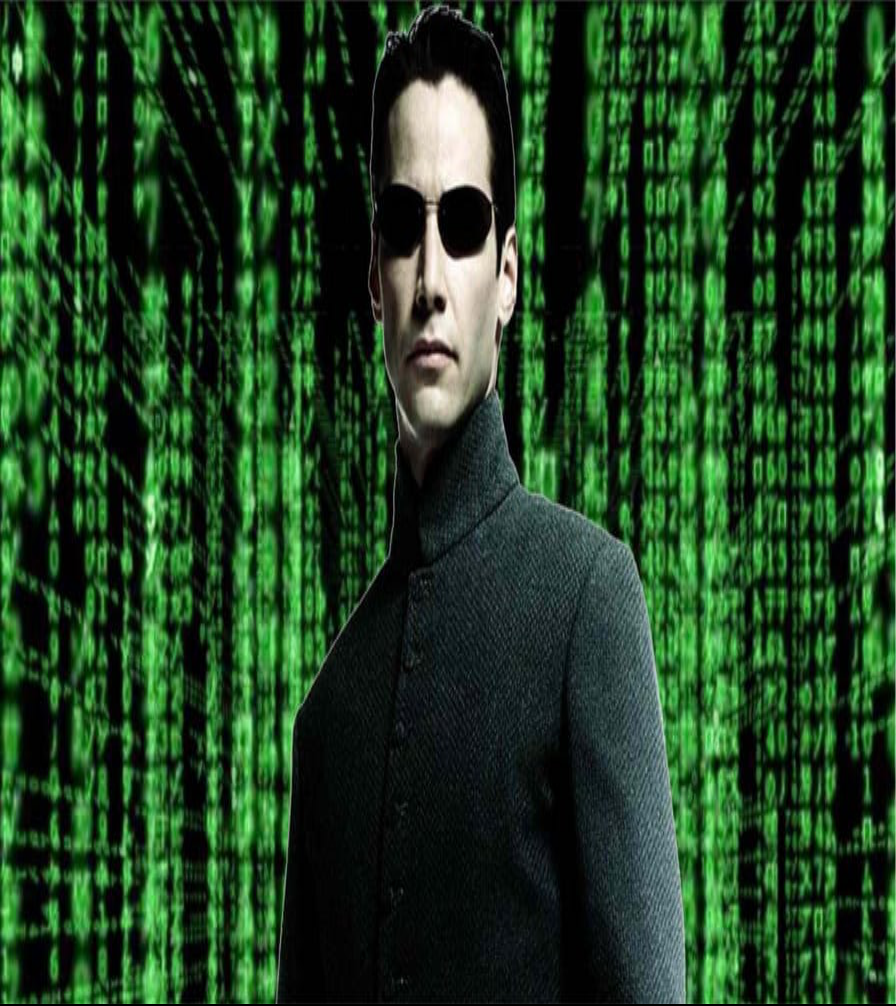

In [8]:
# numpy para tranformar a imagem em array
import numpy as np

# PIL - Imagem para abrir a imagem e transformar o array de volta em imagem
from PIL import Image


# abrindo a imagem com Imagem.open
# transformando a imagem em array com np.array
imagem_original = np.array(Image.open('matrix.jpg'),)

# criando um array com o dobro de linhas da imagem original
# array criado com zero pois os valores serao inseridos por atribuição
imagem_ampliada = np.zeros((imagem_original.shape[0] * 2, imagem_original.shape[1], 3), dtype='uint8')

# variavel i que vai controlar o andamento nas linhas da imagem original
i = 0

for linha in range(len(imagem_ampliada) - 1):
  # se percorremos e preenchemos a linha ímpar da imagem_ampliada então podemos pular para a próxima linha da imagem_original
  if ((linha >1) and ((linha % 2) == 0)):
    i += 1
  for coluna in range((len(imagem_original[0]))):
    
    for rgb in range(3):
      # se estivermos na linha par
      if ((linha % 2) == 0):
        # e se ainda não chegamos no final da linha
        if (i < imagem_original.shape[0] - 1):
          # atribuimos cada valor de r, de g, e de b a imagem_ampliada
          imagem_ampliada[linha][coluna][rgb] = imagem_original[i][coluna][rgb]
      # se estivermos na linha impar
      else:  
        # e se ainda nao chegamos no final da linha
        if (i < imagem_original.shape[0]):
          # verificamos qual o maior numero entre a linha atual da imagem_original e a de baixo
          # encontrando o maior, subtraimos dele o menor, e dividimos a diferença por 2
          # depois acrescentamos o menor nessa diferença
          
          # exemplo, temos Red 250 e o Red da linha de baixo 200
          # a diferença vai dar 50, e dividido por 2 fica 25
          # então somamos 25 a 200, resultando em 225
          # teremos assim na imagem ampliada a linha com o R a 250 a de baixo com R a 225 e a outra de baixo com R a 200
          # assim o mesmo cálculo será feito com o G e o B, em todos os pixels
          if(imagem_original[i][coluna][rgb] > imagem_original[i + 1][coluna][rgb]):
                imagem_ampliada[linha][coluna][rgb] = imagem_original[i][coluna][rgb] - imagem_original[i + 1][coluna][rgb]
                imagem_ampliada[linha][coluna][rgb] = imagem_ampliada[linha][coluna][rgb] // 2
                imagem_ampliada[linha][coluna][rgb] += imagem_original[i + 1][coluna][rgb]
          elif (imagem_original[i + 1][coluna][rgb] > imagem_original[i][coluna][rgb]):
                imagem_ampliada[linha][coluna][rgb] = imagem_original[i + 1][coluna][rgb] - imagem_original[i][coluna][rgb]
                imagem_ampliada[linha][coluna][rgb] = imagem_ampliada[linha][coluna][rgb] // 2
                imagem_ampliada[linha][coluna][rgb] += imagem_original[i][coluna][rgb]
          else:
                imagem_ampliada[linha][coluna][rgb] = imagem_original[i][coluna][rgb]
        # quando i for igual ao final da imagem oringinal paramos as operações
        else:
          break

# transformamos agora o array da imagem_ampliada em imagem, depois de ser preenchido
imagem_ampliada = Image.fromarray(imagem_ampliada, mode='RGB')

imagem_ampliada